In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

<h1>Air reserve DB from csv</h1>

In [3]:
df = pd.read_csv("../input/air_reserve.csv", parse_dates=['visit_datetime', 'reserve_datetime'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
air_store_id        92378 non-null object
visit_datetime      92378 non-null datetime64[ns]
reserve_datetime    92378 non-null datetime64[ns]
reserve_visitors    92378 non-null int64
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 2.8+ MB


In [5]:
df.head()


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [6]:
df.describe()

,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


In [7]:
df.isnull().values.any()

False

Data is clean and it does not contain any missing values.

<h2>Column: air_store_id </h2>

In [8]:
print('The dataset contains info about %s restaurants' % len(df['air_store_id'].unique()))

The dataset contains info about 314 restaurants


In [9]:
# The restaurants sorted by number of reservations
df['air_store_id'].value_counts()

air_8093d0b565e9dbdf    2263
air_e55abd740f93ecc4    1903
air_0a74a5408a0b8642    1831
air_cf5ab75a0afb8af9    1758
air_6d65542aa43b598b    1436
air_de692863bb2dd758    1355
air_326ca454ef3558bc    1282
air_03963426c9312048    1267
air_483eba479dc9910d    1232
air_f911308e19d64236    1197
air_3bb99a1fe0583897    1185
air_24b9b2a020826ede    1143
air_5f6fa1b897fe80d5    1134
air_6b15edd1b4fbb96a    1085
air_877f79706adbfb06    1061
air_2cee51fa6fdf6c0d    1057
air_96743eee94114261     996
air_2d3afcb91762fe01     952
air_a083834e7ffe187e     938
air_1408dd53f31a8a65     918
air_d6b3e67261f07646     898
air_af63df35857b16e6     870
air_7831b00996701c0f     858
air_4092cfbd95a3ac1b     854
air_3c05c8f26c611eb9     839
air_9b6af3db40da4ae2     836
air_de803f7e324936b8     832
air_e7fbee4e3cfe65c5     828
air_3cad29d1a23209d2     823
air_4b55d8aea1d2b395     814
                        ... 
air_a9133955abccf071       2
air_1f1390a8be2272b3       2
air_15ae33469e9ea2dd       2
air_10bbe8acd9

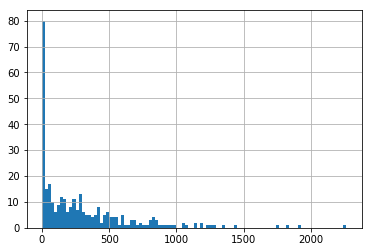

In [10]:
df['air_store_id'].value_counts().hist(bins=100)

<h2>Column: visit_datetime</h2>
<p>Having new Column <code>visit_datetime_weekday_name</code></p>
<p>Having new Column <code>visit_datetime_month</code></p>

In [11]:
df['visit_datetime'].describe()

count                   92378
unique                   4975
top       2016-12-24 19:00:00
freq                      255
first     2016-01-01 19:00:00
last      2017-05-31 21:00:00
Name: visit_datetime, dtype: object

In [12]:
df['visit_datetime'].min()

Timestamp('2016-01-01 19:00:00')

In [13]:
df['visit_datetime'].max()

Timestamp('2017-05-31 21:00:00')

In [17]:
# Having Clumn of the day of the week
# we add new column 'visit_datetime_weekdayname'
df['visit_datetime_weekdayname'] = df['visit_datetime'].dt.weekday_name
print(df['visit_datetime'].dt.weekday.unique())

[4 5 6 0 1 2 3]


In [15]:
# Having Clumn of the day of the week
# we add new column 'visit_datetime_month'
df['visit_datetime_month'] = df['visit_datetime'].dt.month
print(df['visit_datetime_month'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]


## some fects about our time serias in the visit_datetime

#### for Months:
`In[]: df['visit_datetime'].dt.month.unique()
Out[]: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])`

#### for Days:
`In[]: df['visit_datetime'].dt.weekday_name.unique()
Out[]: array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday'], dtype=object)`

#### for Hours:
`In[]: df['visit_datetime].dt.unique()
Out[]: array([16, 19,  1, 15, 14, 20, 17, 22, 12,  2, 18, 13, 21, 11, 23,  0, 10, 8,  9,  4,  7,  3,  6,  5])`


<h2>Column: reserve_datetime</h2>
<p>Having new Column reserve_datetime_weekday_name</p>
<p>Having new Column reserve_datetime_month</p>

In [69]:
#df['reserve_datetime_weekdayname'] = df['reserve_datetime'].dt.weekday_name
df['visit_datetime'].describe()

count                   92378
unique                   4975
top       2016-12-24 19:00:00
freq                      255
first     2016-01-01 19:00:00
last      2017-05-31 21:00:00
Name: visit_datetime, dtype: object

In [70]:
df['reserve_datetime'].min()

Timestamp('2016-01-01 01:00:00')

In [71]:
df['reserve_datetime'].max()

Timestamp('2017-04-22 23:00:00')

In [72]:
# Having Clumn of the day of the week
# we add new column 'reserve_datetime_weekdayname'
df['reserve_datetime_weekdayname'] = df['reserve_datetime'].dt.weekday_name
df['reserve_datetime'].dt.hour.unique()

array([16, 19,  1, 15, 14, 20, 17, 22, 12,  2, 18, 13, 21, 11, 23,  0, 10,
        8,  9,  4,  7,  3,  6,  5])

In [73]:
# Having Clumn of the day of the week
# we add new column 'reserve_datetime_month'
df['reserve_datetime_month'] = df['reserve_datetime'].dt.month

## some fects about our time serias in the reserve_datetime

#### for Months:
`In[]: df['reserve_datetime'].dt.month.unique()
Out[]: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])`

#### for Days:
`In[]: df['reserve_datetime'].dt.weekday_name.unique()
Out[]: array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday'], dtype=object)`

#### for Hours:
`In[]: df['reserve_datetime'].dt.hour.unique()
Out[]: array([16, 19,  1, 15, 14, 20, 17, 22, 12,  2, 18, 13, 21, 11, 23,  0, 10, 8,  9,  4,  7,  3,  6,  5])`


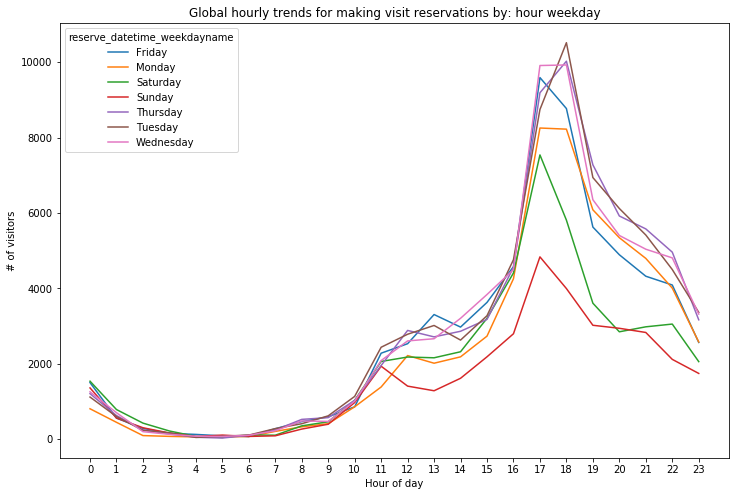

In [74]:
ax = df.pivot_table(index=df['reserve_datetime'].dt.hour, 
                    columns='reserve_datetime_weekdayname', 
                    values='reserve_visitors', 
                    aggfunc='sum').plot(figsize=(12,8), 
                                        title='Global hourly trends for making visit reservations by: hour weekday',
                                        xticks=np.arange(0,24,1)) #the numbers are between 0 to 23 with a 1 jump
 
ax.set_xlabel("Hour of day")
ax.set_ylabel("# of visitors");

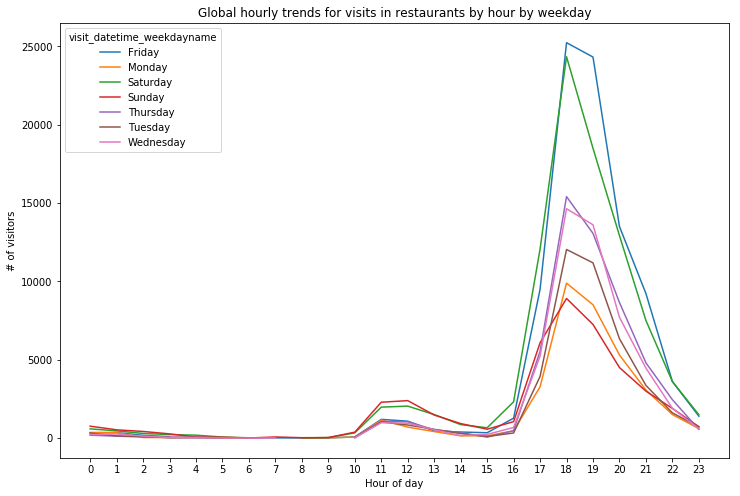

In [75]:
ax = df.pivot_table(index=df['visit_datetime'].dt.hour, 
                    columns='visit_datetime_weekdayname', 
                    values='reserve_visitors', 
                    aggfunc='sum').plot(figsize=(12,8), 
                                        title='Global hourly trends for visits in restaurants by hour by weekday',
                                        xticks=np.arange(0, 24, 1))

ax.set_xlabel("Hour of day")
ax.set_ylabel("# of visitors");


In [76]:
df_visits = df[['visit_datetime', 'reserve_visitors']]

# Set index and delete the column
df_visits.index = df_visits['visit_datetime']
del df_visits['visit_datetime']

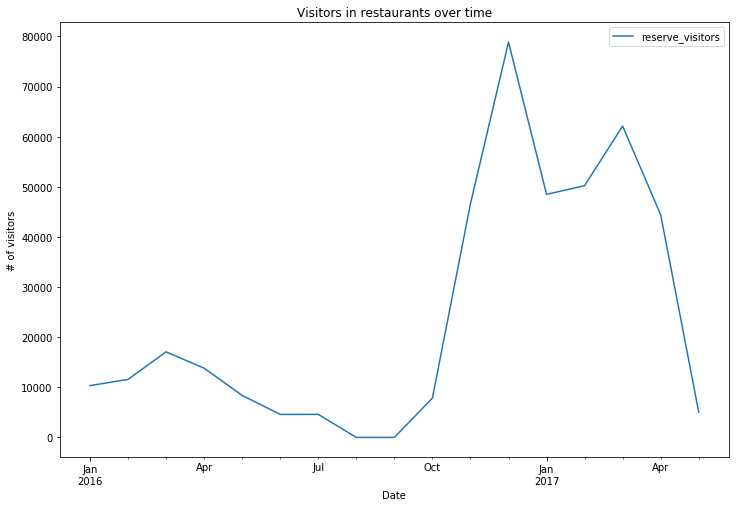

In [77]:
ax = df_visits.resample('M').sum().plot(figsize=(12,8), 
                                        title='Visitors in restaurants over time');
ax.set_xlabel("Date")
ax.set_ylabel("# of visitors");
